In [1]:
using HCubature
using Distributions
using QuadGK

#### Get collision probability

In [2]:
function get_collision_probability_node_newInt(n1,t1,n2,t2,nn,lambda;bound_radius=20.0)

    function h(x)
        y = x[1]
        t = x[2]
        density = (1-cdf(Gamma(nn,lambda),abs(t1-t2-y))) * pdf(Gamma(n2,lambda), t) * pdf(Gamma(n1,lambda),t-y)
        return density
    end
    
    tmax = abs((-n1*n2 + n1 + n2 - 1)*lambda/(1-n1))
    ymax = abs(tmax - (n1-1)*lambda)
    yminmax = min(t1-t2,ymax)
    tminmax = min(tmax,t1-t2 + (n1-1)*lambda)
    
    t1 = abs((-n1*n2 + n1 + n2 - 1)*lambda/(1-n1))
    y1 = abs(t1 - (n1-1)*lambda)
    ymax = max(abs(t1-t2),y1)
    tmax = max(abs(t1-t2 + (n1-1)*lambda),t1)
    
    v = max(ymax,tmax)
    
    #o = bound_radius.*[-1.0,-1.0] .+ [yminmax,tminmax]
    o = bound_radius.*[-1.0,-1.0] .- [v,v]
    p = bound_radius.*[1.0,1.0] .+ [v,v]
    
    println(o)
    println(p)
    
    C, err = hcubature(h,o,p,maxevals=10^8)

    return C, err
end

get_collision_probability_node_newInt (generic function with 1 method)

In [3]:
function get_collision_probability_node2(n1,t1,n2,t2,nn,lambda;bound_radius=50)

    function h(x)
        y = x[1]
        t = x[2]
        density = (1-cdf(Gamma(nn,lambda),abs(t1-t2-y))) * pdf(Gamma(n2,lambda), t) * pdf(Gamma(n1,lambda),t-y)
        return density
    end
    
    #bound = max(t1+n1,t2+n2)*lambda + 30.0
    bound = bound_radius
    
    o = bound.*[-1.0,-1.0]
    p = bound.*[1.0,1.0]
    
    println(o)
    println(p)

    C, err = hcubature(h,o,p,maxevals=10^8)

    return C, err
end

get_collision_probability_node2 (generic function with 1 method)

In [4]:
using Distributions
function count_conflicts(n1,t1,n2,t2,nn,lambda,num_particles)
    EA1 = rand(Gamma(n1,lambda),num_particles)
    EA2 = rand(Gamma(n2,lambda),num_particles)
    ed1 = rand(Gamma(nn,lambda),num_particles)
    ed2 = rand(Gamma(nn,lambda),num_particles)
    
    r1_arrivals = t1 .+ EA1
    r1_departures = r1_arrivals + ed1
    r2_arrivals = t2 .+ EA2
    r2_departures = r2_arrivals + ed2
    
    num_conflicts =length(findall(((r2_departures-r1_arrivals).>0) .& ((r1_departures-r2_arrivals).>0)   ))
    
    return num_conflicts/num_particles
end

count_conflicts (generic function with 1 method)

#### Density

In [5]:
function pdensity(y,t;n1=20,t1=20,n2=50,t2=50,nn=50,lambda=.5)
    n1= 2 
    t1= 33.103863082710596 
    n2= 13 
    t2= 9.982151565372344
    nn= 7
    lambda= 0.8684050517224706
    return (1-cdf(Gamma(nn,lambda),abs(t1-t2-y))) * pdf(Gamma(n2,lambda), t) * pdf(Gamma(n1,lambda),t-y)
end

function ydensity(y,t;n1=20,n2=50,lambda=.5)
    n1= 2 
    t1= 33.103863082710596 
    n2= 13 
    t2= 9.982151565372344
    nn= 7
    lambda= 0.8684050517224706
    return pdf(Gamma(n2,lambda), t) * pdf(Gamma(n1,lambda),t-y)
end

ydensity (generic function with 1 method)

In [53]:
n1 = 81;
t1 = 17.412;
n2 = 23;
t2 = 13.9169;
nn = 79;
lambda = .913559;

In [57]:
n1= 2 
t1= 33.103863082710596 
n2= 13 
t2= 9.982151565372344
nn= 2
lambda= 0.8684050517224706

0.8684050517224706

In [58]:
get_collision_probability_node_newInt(n1,t1,n2,t2,nn,lambda;bound_radius=100.0)

[-110.421, -110.421]
[110.421, 110.421]


(0.01431927135252957, 2.1334983922084162e-10)

In [59]:
get_collision_probability_node2(n1,t1,n2,t2,nn,lambda;bound_radius=110.421)

[-110.421, -110.421]
[110.421, 110.421]


(9.063902596363274e-5, 1.350625628837698e-12)

In [60]:
count_conflicts(n1,t1,n2,t2,nn,lambda,10000)

0.0018

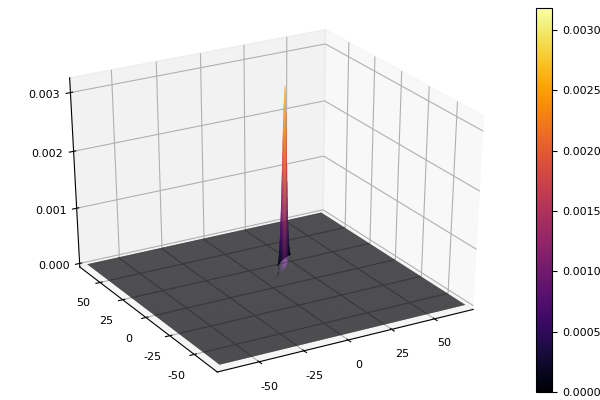

In [48]:
using Plots; pyplot()
x=range(-70,stop=70,length=300)
y=range(-70,stop=70,length=300)
plot(x,y,pdensity,st=:surface,camera=(-30,30))

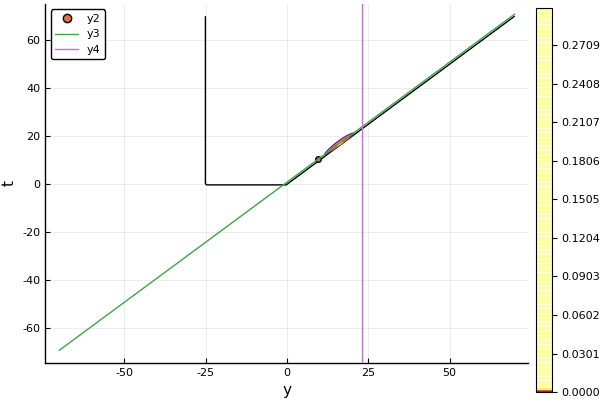

In [50]:
plot(contour(x, y, pdensity; levels = collect(range(0,stop=0.3,length=300))),xlabel="y",ylabel="t")
scatter!([ymax],[tmax])
plot!(x,xt)
vline!([t1-t2])

In [49]:
xt = [xy + (n1-1)*lambda for xy in x]
#tmax = (sqrt(n1*n2 - n1 - n2 + 1))*lambda
tmax = (-n1*n2 + n1 + n2 - 1)*lambda/(1-n1)
ymax = tmax - (n1-1)*lambda

9.552455568947176

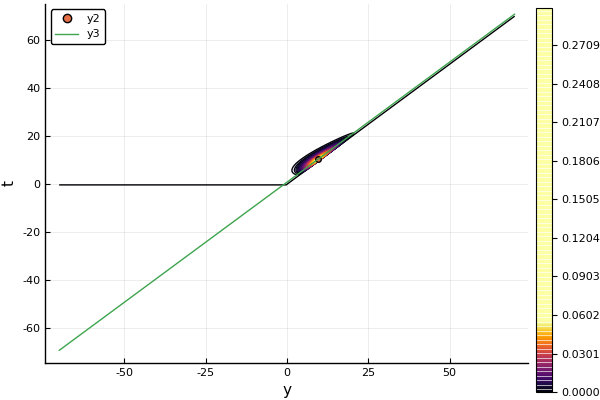

In [51]:
plot(contour(x, y, ydensity; levels = collect(range(0,stop=0.3,length=300))),xlabel="y",ylabel="t")
scatter!([ymax],[tmax])
plot!(x,xt)

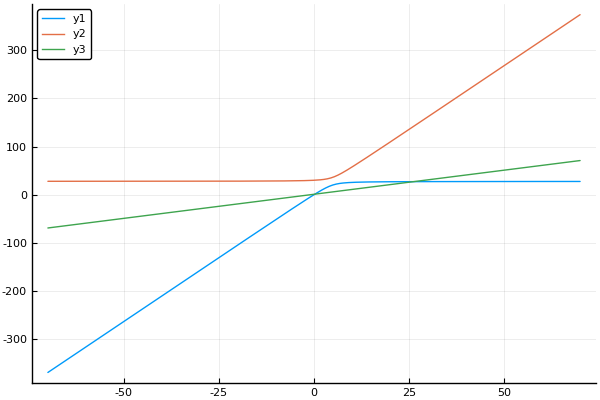

In [52]:
# eq 2
xt = [xy + (n1-1)*lambda for xy in x]

# eq 1
a = -2/lambda
bt = [(n1+n2 + 2*xy/lambda - 2) for xy in x]
ct = [-n2*xy + xy for xy in x]
deltas = [bt[k]^2 - 4*a*ct[k] for (k,_) in enumerate(x)]
root1s = [(-bt[k] + sqrt(deltas[k]))/2*a for (k,_) in enumerate(x)]
root2s = [(-bt[k] - sqrt(deltas[k]))/2*a for (k,_) in enumerate(x)]
plot(x,root1s)
plot!(x,root2s)
plot!(x,xt)